In [1]:
# This is a python program for finance
# It will show you how to compute portfolio simple returns,
# get daily returns and volatilities etc.

In [2]:
# Import the libraires
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock symbols for the portfolio
# FAANG
stockSymbols = ['FB','AMZN','AAPL','NFLX','GOOG']

In [4]:
# Get the stock starting date
stockStartDate = '2014-01-01'

In [5]:
# Get todays date and format it in the form YYYY-mm-dd
today = datetime.today().strftime('%Y-%m-%d')

print(today)

2020-12-27


In [6]:
# Get the number of assets in the portfolio
numAssets = len(stockSymbols)

print('You have '+ str(numAssets)+' assets in you portfolio.')

You have 5 assets in you portfolio.


In [7]:
# Create a function to get the stock prices in the portfilio
def getMyPortfolio(stocks = stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
    data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
    return data

In [8]:
# Get all the stocks separately
#fb = web.DataReader('FB', data_source='yahoo', start=stockStartDate, end=today)['Adj Close']
#amzn = web.DataReader('AMZN', data_source='yahoo', start=stockStartDate, end=today)['Adj Close']
#aapl = web.DataReader('AAPL', data_source='yahoo', start=stockStartDate, end=today)['Adj Close']
#nflx = web.DataReader('NFLX', data_source='yahoo', start=stockStartDate, end=today)['Adj Close']
#goog = web.DataReader('GOOG', data_source='yahoo', start=stockStartDate, end=today)['Adj Close']

In [25]:
# Get the stock portfolio Adj. Close prices
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-12-31,54.650002,398.790009,17.875999,52.595715,558.262512
2014-01-02,54.709999,397.970001,17.624588,51.831429,554.481689
2014-01-03,54.560001,396.440002,17.237453,51.871429,550.436829
2014-01-06,57.200001,393.630005,17.331453,51.367142,556.573853
2014-01-07,57.919998,398.029999,17.207499,48.500000,567.303589
...,...,...,...,...,...
2020-12-18,276.399994,3201.649902,126.660004,534.450012,1731.010010
2020-12-21,272.790009,3206.179932,128.229996,528.909973,1739.369995
2020-12-22,267.089996,3206.520020,131.880005,527.330017,1723.500000


In [26]:
my_stocks.to_csv('stocks_adjusted_prices.csv')

In [27]:
# Create the function to visualize the portfolio
def showGraph(stocks = stockSymbols, start = stockStartDate, end = today, col = 'Adj Close'):
    
    # Create a title for the portfolio
    title = 'Portfolio'+ col + 'Price History'
    
    # my_stocks
    # my_stocks = getMyPortfolio(stocks = stocks, start=start, end=end, col=col)
    
    # give the figure size
    plt.figure(figsize=(12.2, 4.5))
    
    # Loop through each stock and plot the price
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label=c)
        
    plt.title(title)
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel(col, fontsize = 18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()

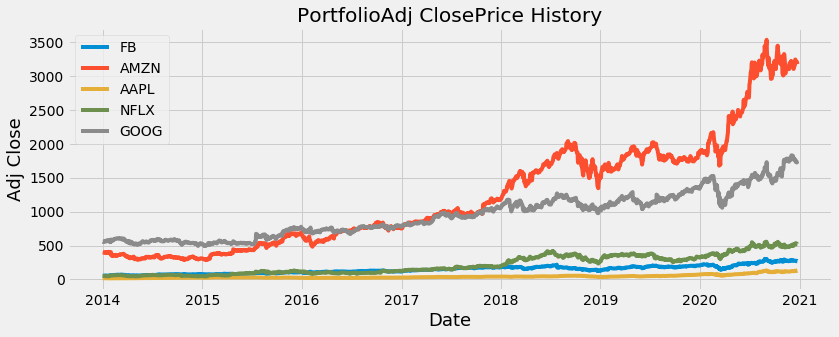

In [28]:
# Show the adjusted close price
showGraph(stockSymbols)

In [29]:
# Calculate the simple returns
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN
2014-01-02,0.001098,-0.002056,-0.014064,-0.014531,-0.006772
2014-01-03,-0.002742,-0.003845,-0.021966,0.000772,-0.007295
2014-01-06,0.048387,-0.007088,0.005453,-0.009722,0.011149
2014-01-07,0.012587,0.011178,-0.007152,-0.055817,0.019278
...,...,...,...,...,...
2020-12-18,0.006995,-0.010639,-0.015851,0.002909,-0.009663
2020-12-21,-0.013061,0.001415,0.012395,-0.010366,0.004830
2020-12-22,-0.020895,0.000106,0.028465,-0.002987,-0.009124


In [30]:
# Show the stock correlation
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.578910,0.528943,0.431438,0.654463
AMZN,0.578910,1.000000,0.511655,0.498023,0.629384
AAPL,0.528943,0.511655,1.000000,0.381993,0.575184
NFLX,0.431438,0.498023,0.381993,1.000000,0.466474
GOOG,0.654463,0.629384,0.575184,0.466474,1.000000


In [31]:
# Show the covariance for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000417,0.000232,0.000195,0.000235,0.000220
AMZN,0.000232,0.000386,0.000181,0.000261,0.000204
AAPL,0.000195,0.000181,0.000325,0.000184,0.000171
NFLX,0.000235,0.000261,0.000184,0.000714,0.000206
GOOG,0.000220,0.000204,0.000171,0.000206,0.000272


In [32]:
# Show the variance
daily_simple_returns.var()

Symbols
FB      0.000417
AMZN    0.000386
AAPL    0.000325
NFLX    0.000714
GOOG    0.000272
dtype: float64

In [33]:
# Print the standard deviation for daily simple returns
print('The stock volatility: ')
daily_simple_returns.std()

The stock volatility: 


Symbols
FB      0.020420
AMZN    0.019643
AAPL    0.018023
NFLX    0.026730
GOOG    0.016498
dtype: float64

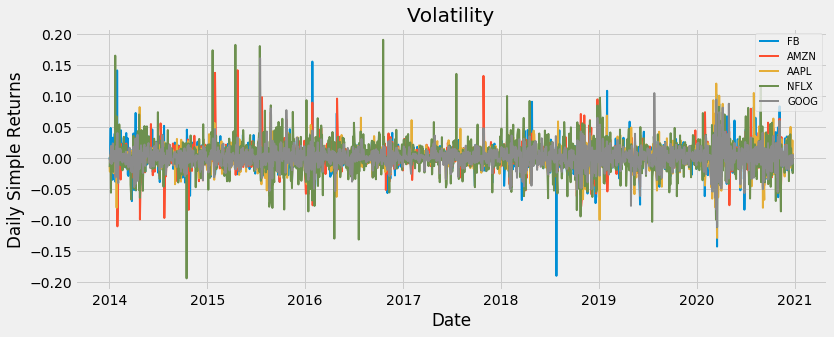

In [34]:
# Visualize the stocks daily simple returns
plt.figure(figsize = (12,4.5))

# Loope through each stock and plot the simple returns
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)
    
# Create a legend
plt.legend(loc='upper right', fontsize = 10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()

In [35]:
# Show the mean of the daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean()

# Print
print('The daily mean simple return: ')
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.001112
AMZN    0.001372
AAPL    0.001300
NFLX    0.001651
GOOG    0.000782
dtype: float64


In [36]:
# Calculate the expected portfolio daily return
randomWeights = np.array([0.4,0.1,0.3,0.1,0.1]) # 40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOGL

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

# Print the expected portfolio returns
print('The daily expected portfolio return: ' + str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0012152159959197318


In [37]:
# Get the yearly simple returns
print('Expected annualised portfolio simple return: ' + str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return: 0.30744964696769217


In [38]:
# Calculate the growth of the investment
dailyCumulSimpleReturn = (daily_simple_returns+1).cumprod()

# Show the cumulative simple returns
dailyCumulSimpleReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN
2014-01-02,1.001098,0.997944,0.985936,0.985469,0.993228
2014-01-03,0.998353,0.994107,0.964279,0.986229,0.985982
2014-01-06,1.046661,0.987061,0.969538,0.976641,0.996975
2014-01-07,1.059835,0.998094,0.962603,0.922128,1.016195
...,...,...,...,...,...
2020-12-18,5.057639,8.028411,7.085478,10.161474,3.100710
2020-12-21,4.991583,8.039770,7.173305,10.056142,3.115685
2020-12-22,4.887283,8.040623,7.377490,10.026102,3.087257


In [39]:
#(period_1 + 1) * (period_2 + 1) * ...* (period_n + 1)
(daily_simple_returns['GOOG'][1] + 1) * (daily_simple_returns['GOOG'][2]+1)

0.9859820721925031

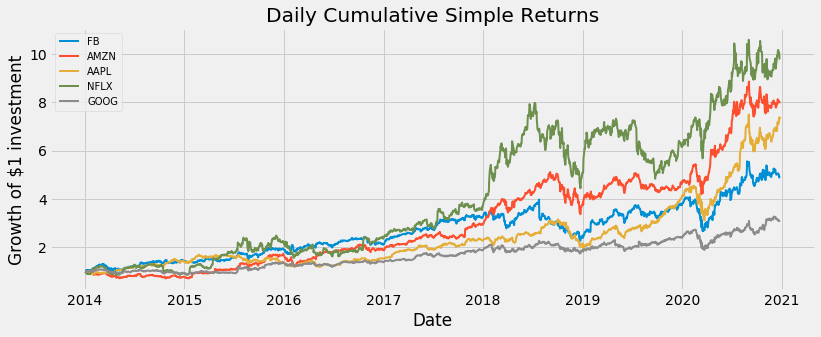

In [40]:
# Visualise the daily cumulative simple returns
plt.figure(figsize=(12.2,4.5))

for c in dailyCumulSimpleReturn.columns.values:
    plt.plot(dailyCumulSimpleReturn.index, dailyCumulSimpleReturn[c], lw=2, label=c)
    
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')
plt.show()